# Laboratorium 8 - Page Rank (Wojciech Kosztyła)

___

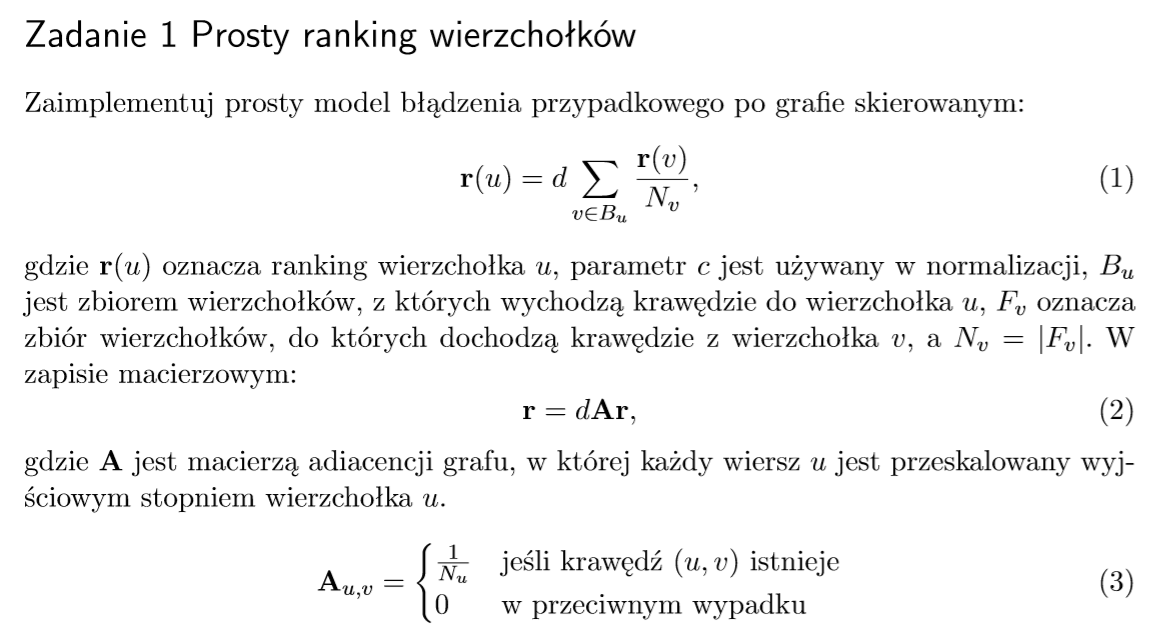
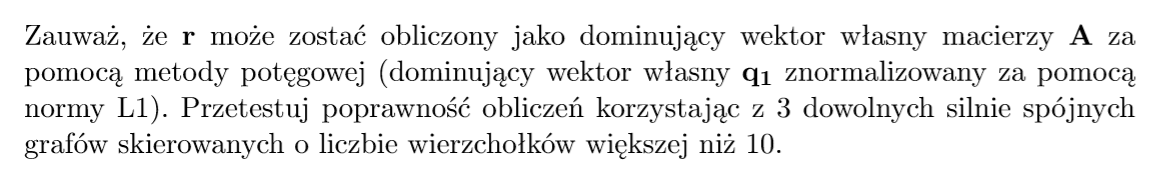

___


In [52]:
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the 'c:\users\wojciech\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\wojciech\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Rozpocząłem od stworzenia funkcji generujących losowy silnie spójny graf skierowany.

In [53]:
def create_random_directed_graph(nodes, edges):
    temp_graph = nx.DiGraph()
    temp_graph.add_nodes_from(range(nodes))
    for i in range(edges):

        node_from = random.randint(0, nodes-1)
        node_to =   random.randint(0, nodes-1)

        while (node_from, node_to) in temp_graph.edges:
            node_from = random.randint(0, nodes - 1)
            node_to =   random.randint(0, nodes - 1)

        temp_graph.add_edge(node_from, node_to)
    return temp_graph


def create_random_strongly_connected_directed_graph(nodes, min_edges):
    temp_graph = create_random_directed_graph(nodes, min_edges)
    while not nx.is_strongly_connected(temp_graph):

        node_from = random.randint(0, nodes-1)
        node_to = random.randint(0, nodes-1)

        while (node_from, node_to) in temp_graph.edges:
            node_from = random.randint(0, nodes-1)
            node_to = random.randint(0, nodes-1)

        temp_graph.add_edge(node_from, node_to)
    return temp_graph

Napisałem również funkcję, tworzącą i ew. zapisującą graficzną reprezentację grafu.

In [54]:
def show_graph(graph, save=False, name=""):
    filename = "graph-{}__nodes-{}__edges-{}.png".format(name, graph.number_of_nodes(), graph.number_of_edges())

    print("Rozpoczynam generowanie " + filename)
    
    

    fig1, ax1 = plt.subplots(figsize=(20,10))

    ax1.set_title(name)
    nx.draw(graph, pos=nx.circular_layout(graph))

    fig1.show()
    if save:
        fig1.savefig("zad1/plots/" + filename)
        print("Plik " + filename + " został zapisany.")
        pass
    else:
        print("Skończone generowanie " + filename)

Przetestuję teraz generacje grafów jak i ich wyświetlanie.

Rozpoczynam generowanie graph-__nodes-6__edges-13.png
Skończone generowanie graph-__nodes-6__edges-13.png
Rozpoczynam generowanie graph-__nodes-10__edges-35.png
Skończone generowanie graph-__nodes-10__edges-35.png


<ipython-input-54-2cf10f8e6d68>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


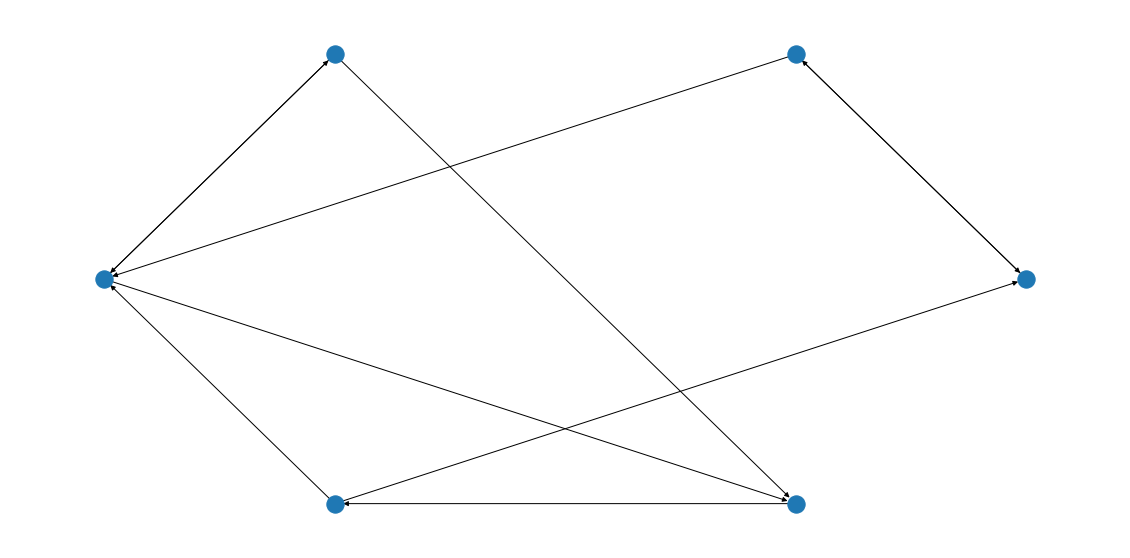

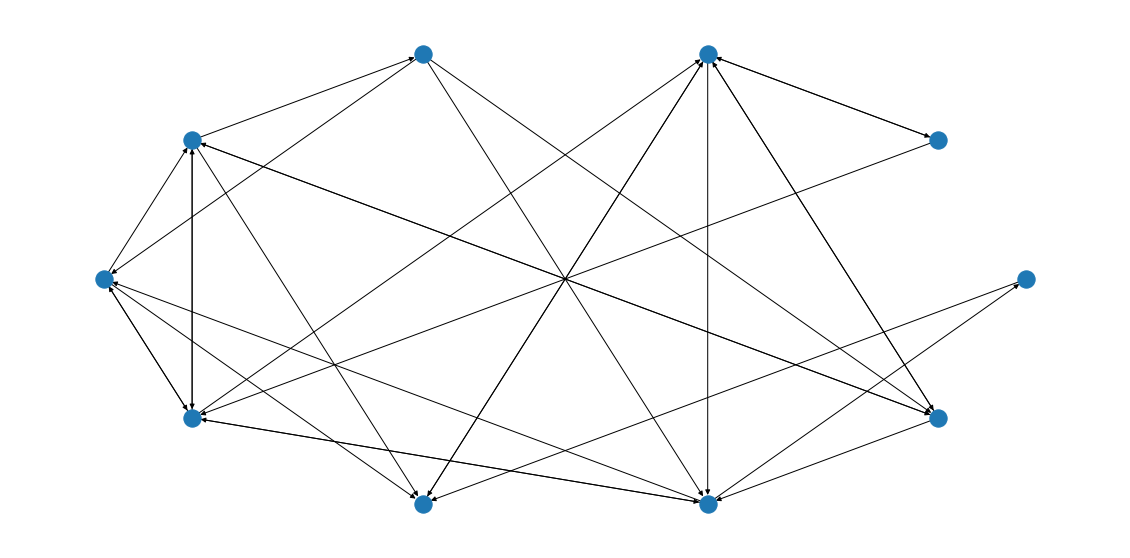

In [55]:
show_graph(create_random_strongly_connected_directed_graph(6, 6))
show_graph(create_random_strongly_connected_directed_graph(10, 6))

Następnie utworzyłem funkcję do tworzenia tej zmodyfikowanej macierzy adjacencji (A_u,v)

In [56]:
def create_adjacency_matrix(graph):
    matrix_A = nx.to_numpy_array(graph)
    temp = np.sum(matrix_A, axis=1)
    for i in range(len(matrix_A)):
        matrix_A[i] = matrix_A[i] / temp[i]
    return matrix_A

[[0.         0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5        0.        ]
 [0.         0.5        0.5        0.        ]
 [0.5        0.         0.5        0.        ]]
Rozpoczynam generowanie graph-__nodes-4__edges-9.png
Skończone generowanie graph-__nodes-4__edges-9.png


<ipython-input-54-2cf10f8e6d68>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


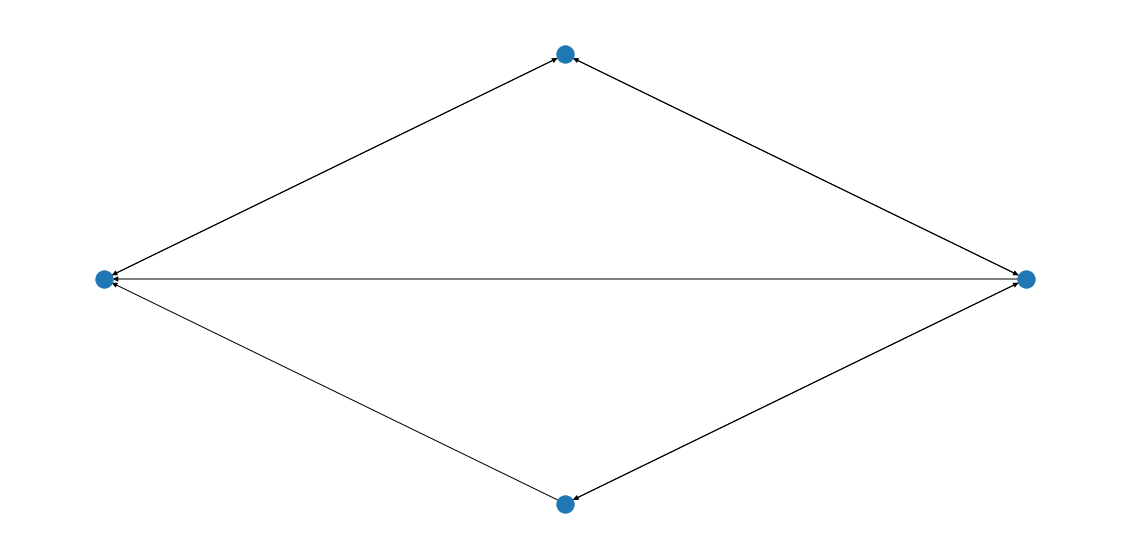

In [57]:
g = create_random_strongly_connected_directed_graph(4,0)
print(create_adjacency_matrix(g))
show_graph(g)

Napisałem funkcję do tworzenia dominującego wektora własnego macierzy

In [58]:
def metoda_potegowa__wektor_dom_wlasny(macierz):

    n = len(macierz)
    wektor = np.random.rand(n, 1)

    for _ in range(100000):
        nowy_wektor = macierz @ wektor
        nowy_wektor = nowy_wektor / np.linalg.norm(nowy_wektor, ord=1)

        if np.linalg.norm(wektor - nowy_wektor, ord=1) < 0.00000000001:
            return nowy_wektor

        wektor = nowy_wektor

    return wektor

In [63]:
metoda_potegowa__wektor_dom_wlasny(create_adjacency_matrix(create_random_directed_graph(3,4)))

array([[0.26556385],
       [0.26556385],
       [0.46887229]])

Przy zaimplementowanej metodzie potęgowej wystarczy napisać prostą funkcję

In [65]:
def simple_page_rank(graph):
    temp_adjacency_matrix = create_adjacency_matrix(graph)
    temp_vector = metoda_potegowa__wektor_dom_wlasny(temp_adjacency_matrix)
    return temp_vector

In [69]:
temp1_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(10,0))
temp2_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(20,0))
temp3_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(30,0))
print(temp1_simple_page_rank)
print(temp2_simple_page_rank)
print(temp3_simple_page_rank)
print(np.linalg.norm(temp1_simple_page_rank, ord=1))

[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]
[[0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]]
[[0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]
 [0.03333333]]
1.0
